In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [5]:
X,y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

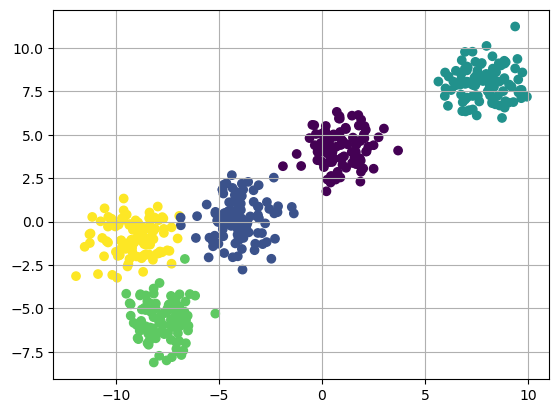

In [6]:
fig = plt.figure()
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# <font color="red">final goal is to determine 5 cluster centers</font>

# <font color="green"> STEP 1: INITIALIZE CENTERS RANDOMLY </font>

In [7]:
k=5

colors = ["green", "yellow", "blue", "cyan", "red"]

clusters = {}

for idx in range(k):
    center = np.random.uniform(-10,10,2)
    points = []
    cluster = {
        'center' : center,
        'points' : [],
        'color'  : colors[idx]
    }
    clusters[idx] = cluster

In [8]:
clusters

{0: {'center': array([-4.47045338,  7.05242973]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.17324829, -8.08438827]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-2.91413003, -8.92767126]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-7.57665693,  8.7708871 ]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([ 6.65803639, -4.69566984]),
  'points': [],
  'color': 'red'}}

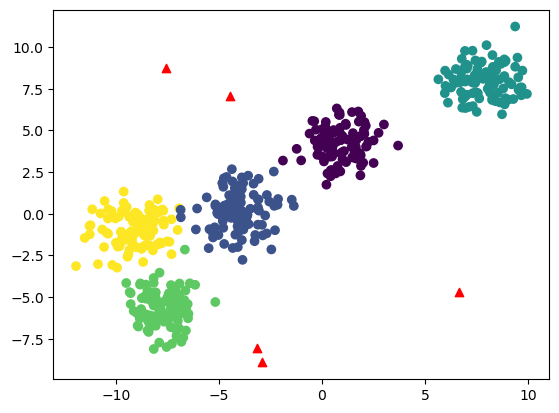

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker ='^', c="red")
plt.show()

# <font color="green"> STEP 2: ASSIGN EACH POINT TO NEAREST CENTER     </font>

#### implementing E step

In [10]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [11]:
def assign_clusters():
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis =  distance (curr_x, clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        
        clusters[curr_cluster]['points'].append(curr_x)

In [18]:
clusters

{0: {'center': array([-4.47045338,  7.05242973]),
  'points': [array([-3.61995355, -0.07726913]),
   array([-4.65743008,  0.05077508]),
   array([7.44598269, 9.20313614]),
   array([-3.8987193 ,  0.15219193]),
   array([8.84851188, 9.26501008]),
   array([-4.65780461,  0.51339663]),
   array([1.87879015, 3.51452443]),
   array([1.46173901, 3.38024741]),
   array([-3.78877994, -0.0248327 ]),
   array([-0.22816528,  3.53653954]),
   array([-10.3969262 ,  -0.28827972]),
   array([-9.18719238, -0.47349654]),
   array([-4.45650534,  0.65156136]),
   array([-8.11324217, -0.41686247]),
   array([-10.22494442,   0.16581105]),
   array([0.34123054, 4.31357332]),
   array([0.42745643, 2.61640063]),
   array([0.14207575, 4.19267027]),
   array([7.03293513, 7.14165643]),
   array([0.99185358, 3.27429903]),
   array([1.66378785, 3.60258303]),
   array([0.49931013, 3.97388479]),
   array([-8.94815361, -0.83618661]),
   array([-6.85842659, -0.2135485 ]),
   array([7.33596746, 7.8622887 ]),
   array([

## <font color="green"> STEP 3: PLOTTING CLUSTERS </font>

In [21]:
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0], pts[:,1], c=clusters[i]['color'])
        except:
            pass
        
        center = clusters[i]['center']
        plt.scatter(center[0],center[1], c="black", marker="^")

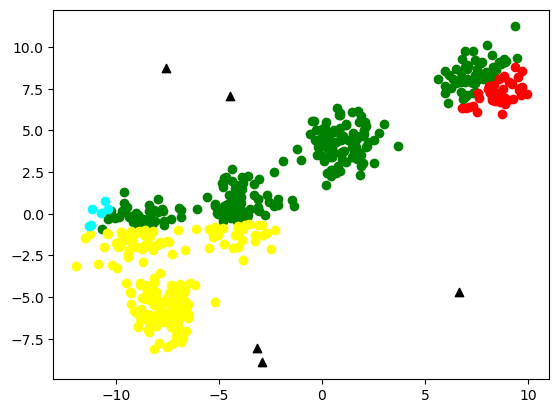

## <font color="green"> STEP 4: UPDATING THE CENTER LOCATION BY TAKING MEAN </font>

#### implementing M step

In [27]:
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]["points"])
        
        if(pts.shape[0] > 0):
            new_center = pts.mean(axis=0)
            clusters[idx]["center"] = new_center
            
            clusters[idx]["points"] = []
        

In [ ]:
for i in range(10000):
    assign_clusters()
    plot_clusters()
    update_clusters()